# 1. Titanic (Regression)

In [70]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import warnings
warnings.filterwarnings('ignore')

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

### 타이타닉 데이터 불러오기

In [71]:
train = pd.read_csv('/Users/eomseonjin/Desktop/train.csv')
test = pd.read_csv('/Users/eomseonjin/Desktop/test.csv')
combine = [train, test]

### 데이터 분석

In [72]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [73]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [75]:
train.info()
print('-'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [76]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [77]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Ward, Miss. Anna",male,1601,B96 B98,S
freq,1,577,7,4,644


## feature enginearing

#### 모델 정확도를 높이기 위해서 주어진 데이터를 예측 모델의 문제를 잘 표현할 수 있는 features로 변형시키는 과정이다.

#### 이름

In [78]:
combine = [train, test]

for dataset in combine:
    dataset['Title'] = dataset['Name'].str.extract('([A-za-z]+)\.', expand=False)
# 이름에서 Mr., Miss., Mrs.만 빼내는 작업

In [79]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Jonkheer      1
Don           1
Capt          1
Sir           1
Lady          1
Ms            1
Mme           1
Countess      1
Name: Title, dtype: int64

In [80]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

In [81]:
# mapping을 이용해서 0,1,2,3으로 분류
title_mapping = {"Mr":0, "Miss":1, "Mrs":2,
                "Master":3, "Dr":3, "Rev":3, "Col": 3, 'Ms': 3, 'Mlle': 3, "Major": 3, 'Lady': 3, 'Capt': 3,
                 'Sir': 3, 'Don': 3, 'Mme':3, 'Jonkheer': 3, 'Countess': 3, 'Dona': 3 }
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
#MR: 0, Miss: 1, Mrs: 2, Others: 3 

In [82]:
test['Title'].fillna(train.groupby('Title')['Title'].transform('median'),inplace=True)

In [83]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [84]:
# 데이터 셋에서 불필요한 Name 삭제
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [85]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


#### 성별

In [86]:
# mapping을 이용해서 male을 0 female을 1로 분류
sex_mapping = {"male": 0, "female":1}
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [87]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


#### 나이 

In [88]:
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'),inplace=True)
test['Age'].fillna(train.groupby('Title')['Age'].transform('median'),inplace=True)
#fillna는 NaN(값이 없는 것)을 특정 값으로 대체

In [89]:
train.info()
#null확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [90]:
train.loc[ train['Age'] <= 18, 'Age'] = 0
train.loc[(train['Age'] > 18) & (train['Age'] <= 28), 'Age'] = 1
train.loc[(train['Age'] > 28) & (train['Age'] <= 38), 'Age'] = 2
train.loc[(train['Age'] > 38) & (train['Age'] <= 48), 'Age'] = 3
train.loc[(train['Age'] > 48) & (train['Age'] <= 62), 'Age'] = 4
train.loc[ train['Age'] > 62, 'Age'] = 5

test.loc[ test['Age'] <= 18, 'Age'] = 0
test.loc[(test['Age'] > 18) & (test['Age'] <= 28), 'Age'] = 1
test.loc[(test['Age'] > 28) & (test['Age'] <= 38), 'Age'] = 2
test.loc[(test['Age'] > 38) & (test['Age'] <= 48), 'Age'] = 3
test.loc[(test['Age'] > 48) & (test['Age'] <= 62), 'Age'] = 4
test.loc[ test['Age'] > 62, 'Age'] = 5

In [91]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,2.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


#### Embarked

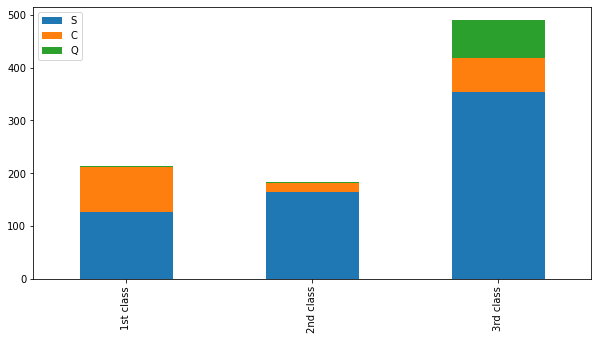

In [92]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5));

In [93]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna('C')

In [94]:
embarked_mapping = {'S':0, 'C':1, 'Q':2}
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [95]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,2.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


#### Fare

In [96]:
train["Fare"].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace=True)
test["Fare"].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace=True)

In [97]:
train.loc[ train['Fare'] <= 17, 'Fare'] = 0
train.loc[(train['Fare'] > 17) & (train['Fare'] <= 30), 'Fare'] = 1
train.loc[(train['Fare'] > 30) & (train['Fare'] <= 100), 'Fare'] = 2
train.loc[ train['Fare'] > 100, 'Fare'] = 3

test.loc[ test['Fare'] <= 17, 'Fare'] = 0
test.loc[(test['Fare'] > 17) & (test['Fare'] <= 30), 'Fare'] = 1
test.loc[(test['Fare'] > 30) & (test['Fare'] <= 100), 'Fare'] = 2
test.loc[ test['Fare'] > 100, 'Fare'] = 5

In [98]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,2.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


#### Cabin

In [99]:
for dataset in combine:
    dataset['Cabin'] = dataset['Cabin'].str[:1] #앞 글자만 추출

<AxesSubplot:>

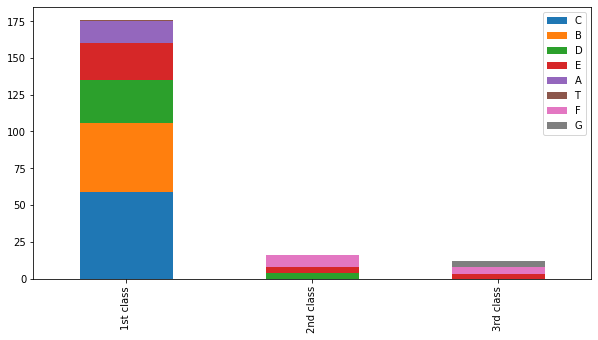

In [100]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [101]:
cabin_mapping = {'A':0, 'B':0.4, 'C':0.8, 'D':1.2, 'E':1.6, 'F':2, 'G':2.4, 'T': 2.8}
for dataset in combine:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [102]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

#### Family size

In [103]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1
#본인 포함해야하기 때문에 +1

In [104]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in combine:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [105]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,2.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [106]:
features_drop = ['Ticket', 'SibSp', 'Parch'] #분류되지 않는 특징들 없애준다.
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [107]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [108]:
train.head(100)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,1,2.0,2.0,0.8,1,2,0.4
2,1,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,1,2.0,2.0,0.8,0,2,0.4
4,0,3,0,2.0,0.0,2.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...
95,0,3,0,2.0,0.0,2.0,0,0,0.0
96,0,1,0,5.0,2.0,0.0,1,0,0.0
97,1,1,0,1.0,2.0,1.2,1,0,0.4
98,1,2,1,2.0,1.0,1.8,0,2,0.4


In [109]:
test.head(100)

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.0,2,0,0.0
1,893,3,1,3.0,0.0,2.0,0,2,0.4
2,894,2,0,4.0,0.0,2.0,2,0,0.0
3,895,3,0,1.0,0.0,2.0,0,0,0.0
4,896,3,1,1.0,0.0,2.0,0,2,0.8
...,...,...,...,...,...,...,...,...,...
95,987,3,0,1.0,0.0,2.0,0,0,0.0
96,988,1,1,5.0,2.0,0.8,0,2,0.4
97,989,3,0,2.0,0.0,2.0,0,0,0.0
98,990,3,1,1.0,0.0,2.0,0,1,0.0


In [110]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

## Logistic Regression을 이용해 정확도 계산

In [111]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.59

In [112]:
Y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [116]:
sample_submission['Survived'] = Y_pred

In [117]:
sample_submission.to_csv('/Users/eomseonjin/Desktop/final.csv', index = False)

In [50]:
from IPython.display import Image

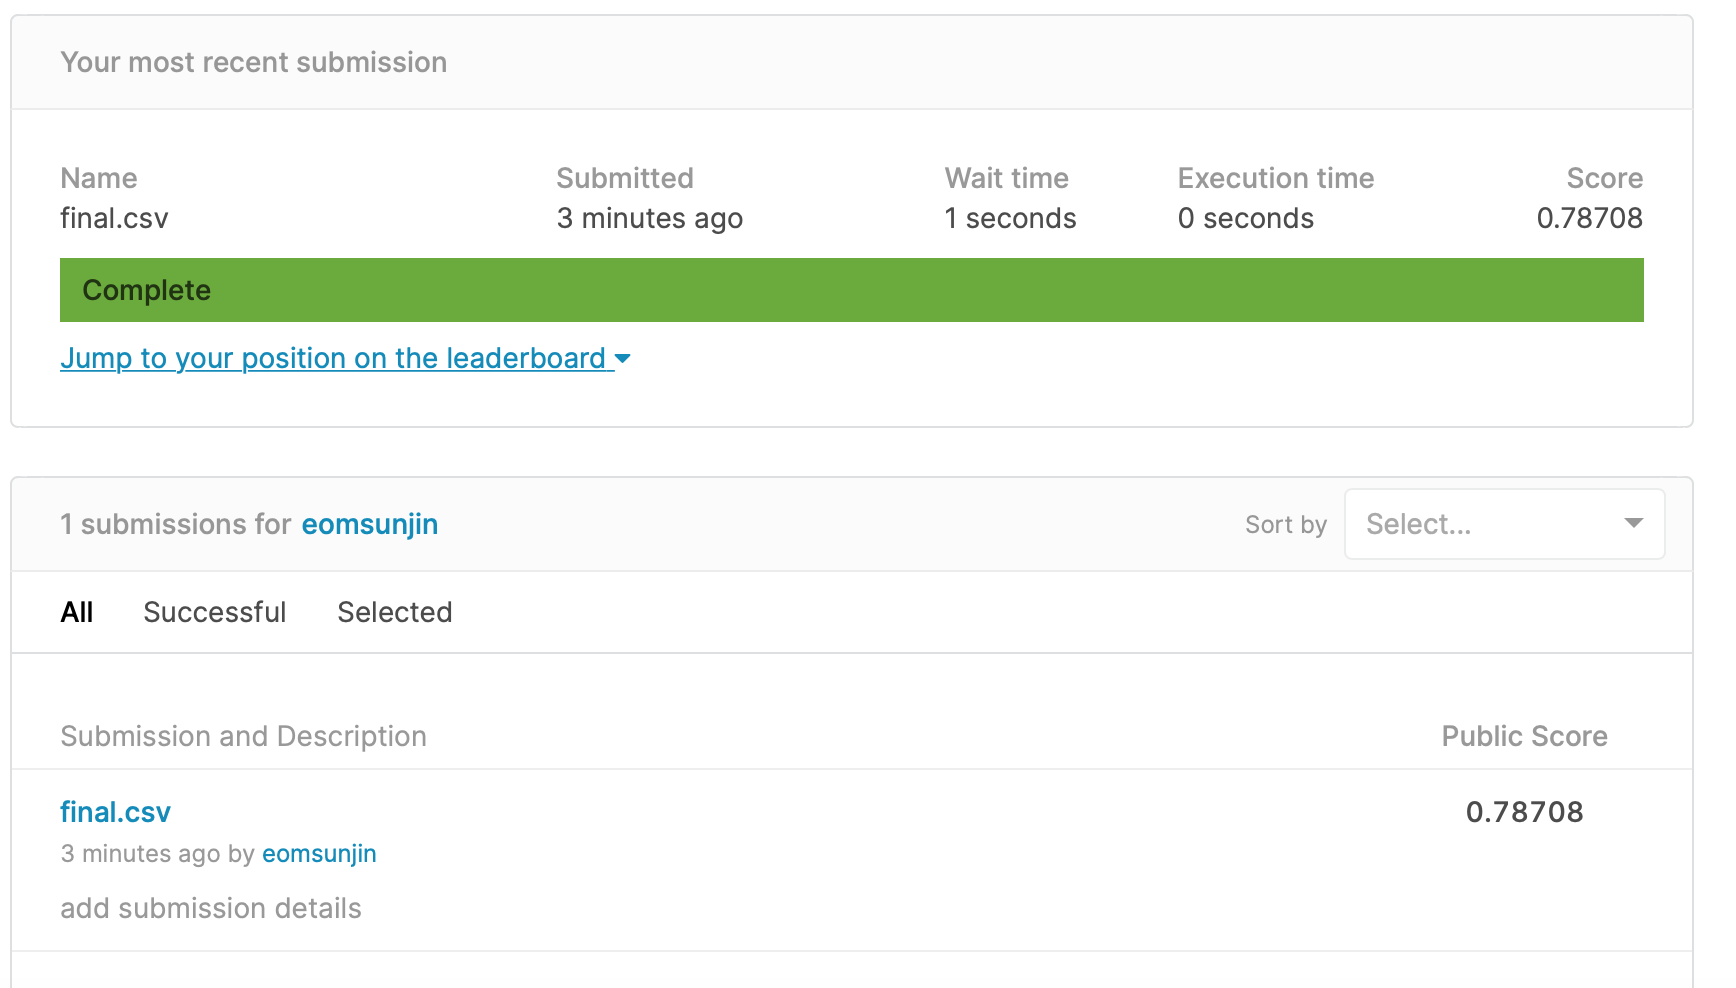

In [286]:
Image("/Users/eomseonjin/Desktop/accuracy.png")

# 2. Image classification with CNN

In [237]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [238]:
batch_size = 4

trainset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=True,
    download=True, 
    transform=torchvision.transforms.ToTensor()
)
train_loader = torch.utils.data.DataLoader(
    trainset, 
    batch_size=batch_size,
    shuffle=True
)

testset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=False,
    download=True, 
    transform=torchvision.transforms.ToTensor()
)
test_loader = torch.utils.data.DataLoader(
    testset, 
    batch_size=batch_size,
    shuffle=False
)

classes = trainset.classes
classes

Files already downloaded and verified
Files already downloaded and verified


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

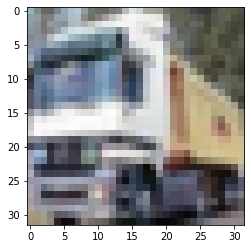

In [239]:
images=train_loader.dataset[1][0]
plt.imshow(images.permute(1, 2, 0))

In [243]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

In [246]:
(train_datas, train_labels), (test_datas, test_labels) = datasets.cifar10.load_data()
train_datas.shape, train_labels.shape, test_datas.shape, test_labels.shape

170508288/170498071 [==============================] - 1533s 9us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [260]:
cifar10 = datasets.cifar10 
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
 
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
 
print("Train samples:", train_images.shape, train_labels.shape)
print("Test samples:", test_images.shape, test_labels.shape)
 
train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3))

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


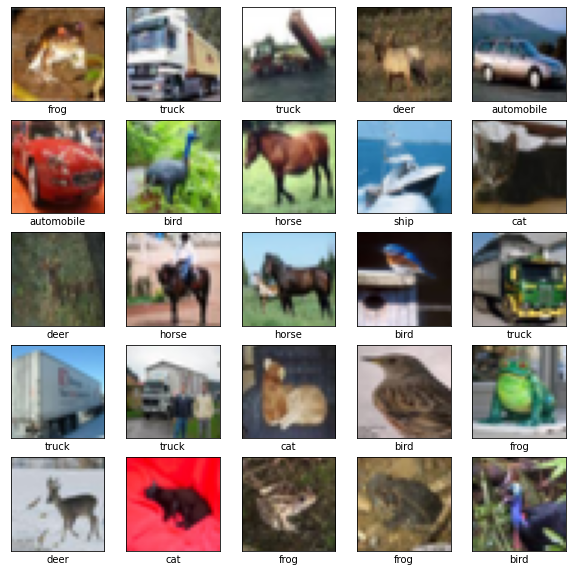

In [261]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [262]:
train_images = train_images/255.0
test_images = test_images/255.0

In [263]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [264]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
 
print('Test accuracy:', test_acc) 

Epoch 1/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.4993 - accuracy: 0.4541
Epoch 2/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.1341 - accuracy: 0.6009
Epoch 3/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.9939 - accuracy: 0.6530
Epoch 4/10
1563/1563 [==============================] - 49s 32ms/step - loss: 0.8945 - accuracy: 0.6894
Epoch 5/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.8196 - accuracy: 0.7135
Epoch 6/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.7675 - accuracy: 0.7333
Epoch 7/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.7168 - accuracy: 0.7487
Epoch 8/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.6776 - accuracy: 0.7612
Epoch 9/10
1563/1563 [==============================] - 52s 34ms/step - loss: 0.6401 - accuracy: 0.7764
Epoch 10/10
313/313 [==============================] - 3s 9ms/st

In [265]:
predictions = model.predict(test_images)

In [266]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
 
  plt.imshow(img, cmap=plt.cm.binary)
 
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
 
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label[0]]),
                                color=color)

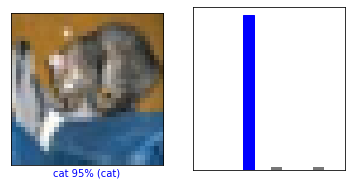

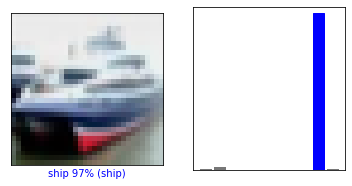

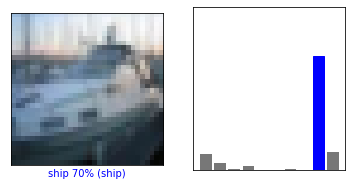

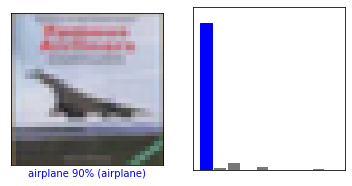

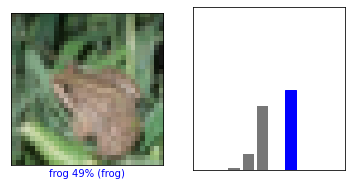

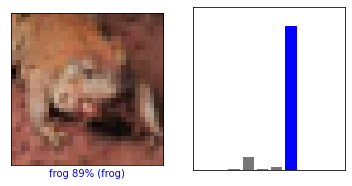

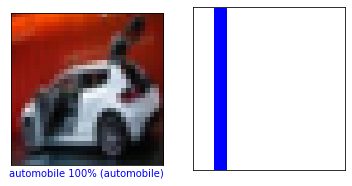

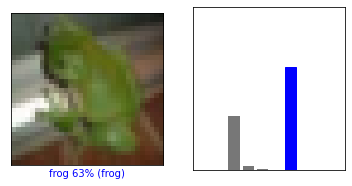

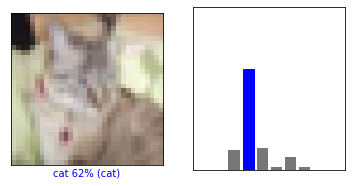

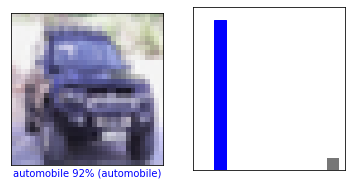

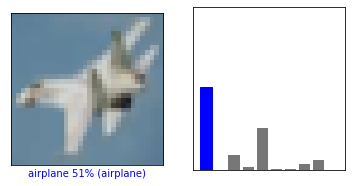

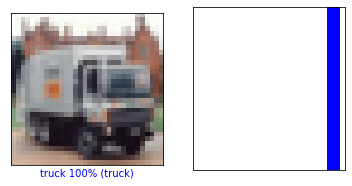

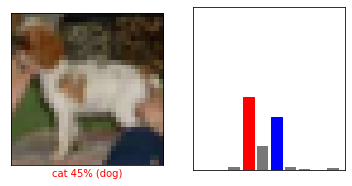

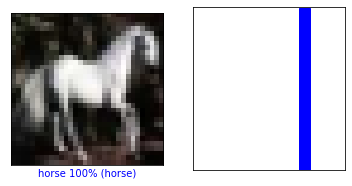

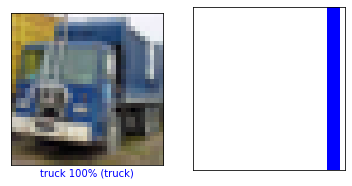

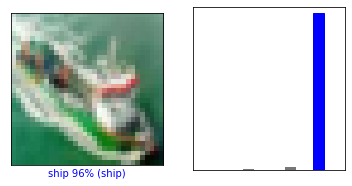

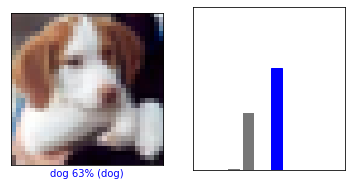

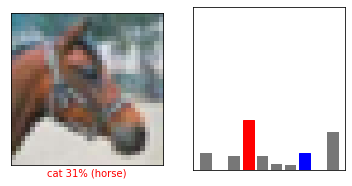

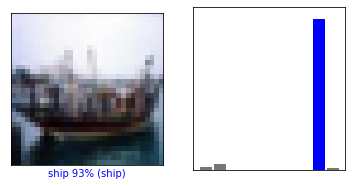

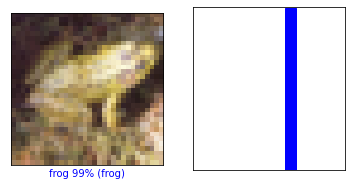

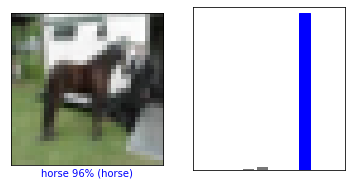

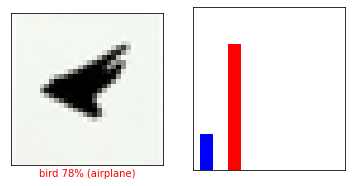

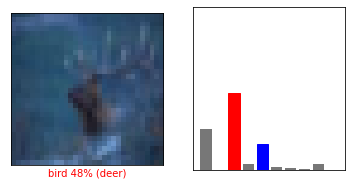

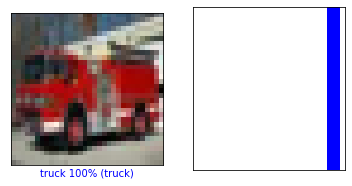

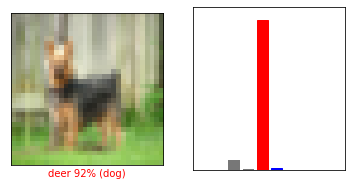

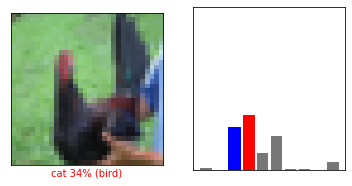

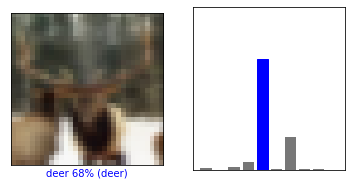

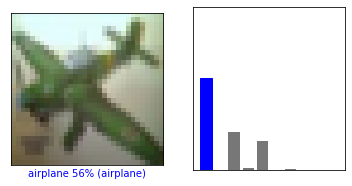

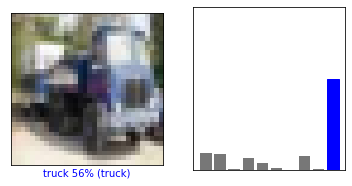

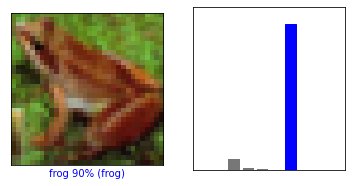

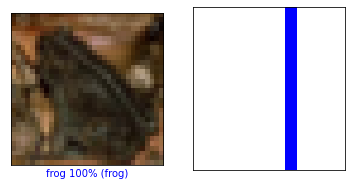

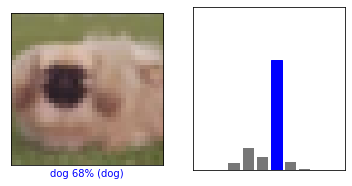

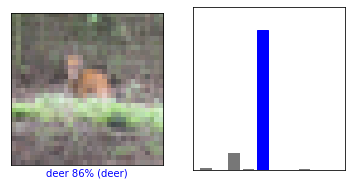

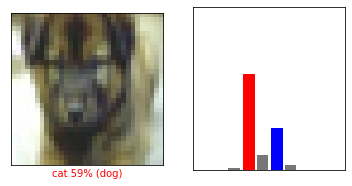

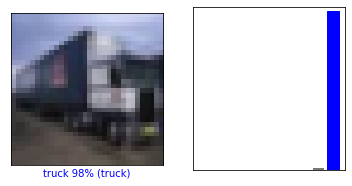

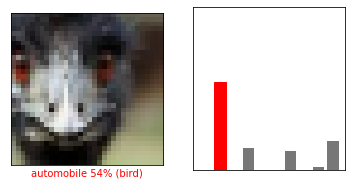

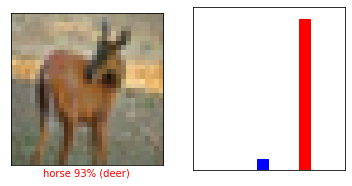

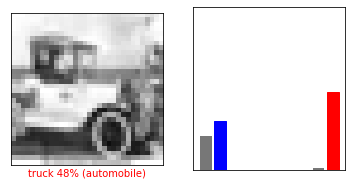

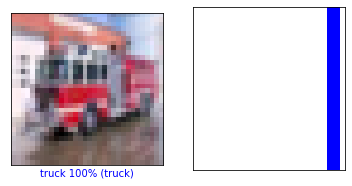

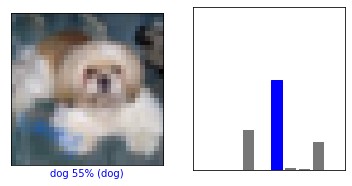

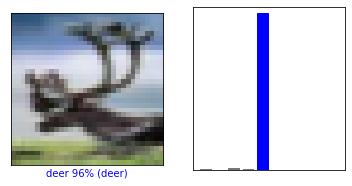

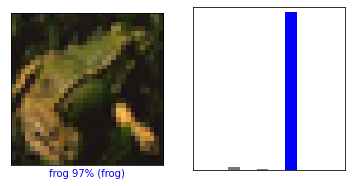

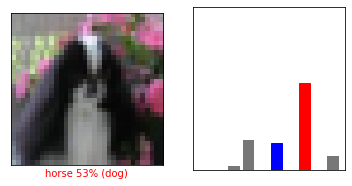

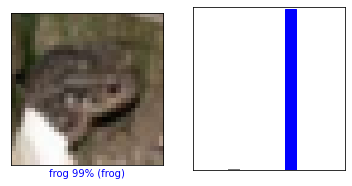

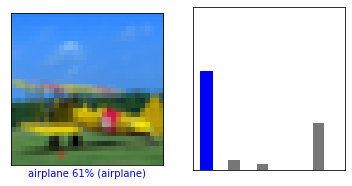

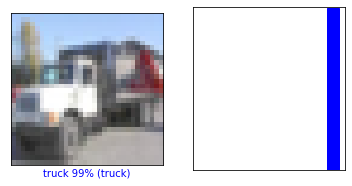

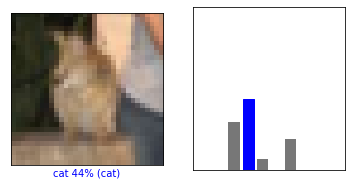

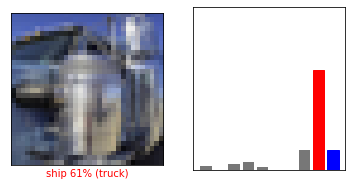

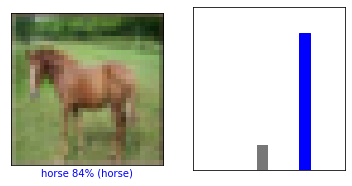

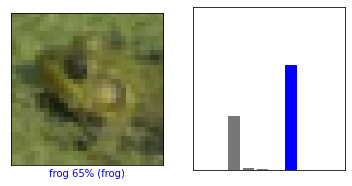

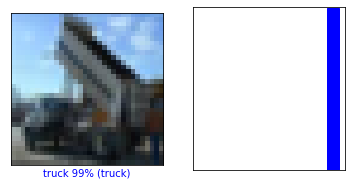

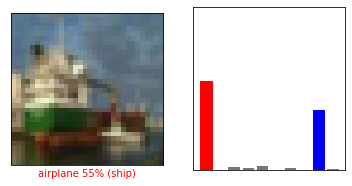

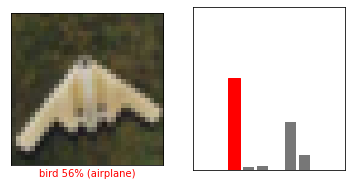

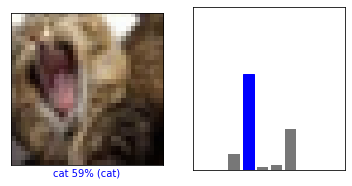

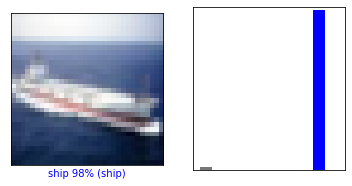

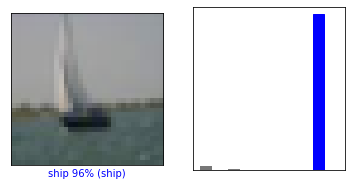

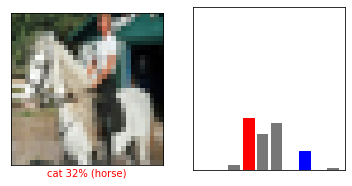

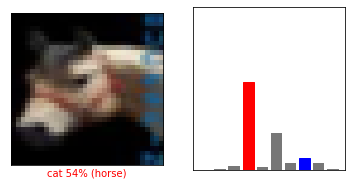

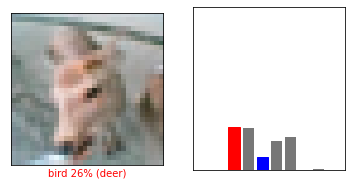

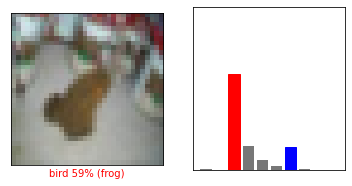

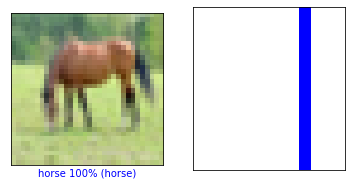

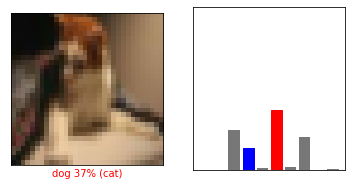

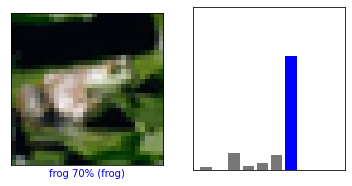

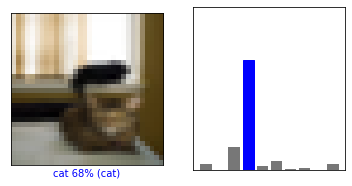

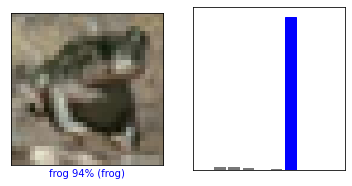

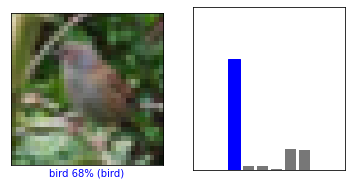

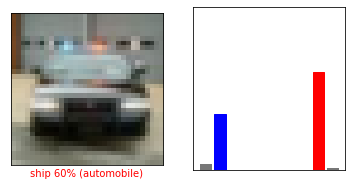

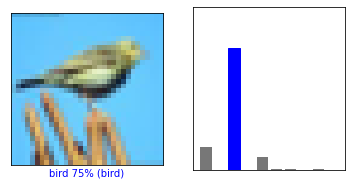

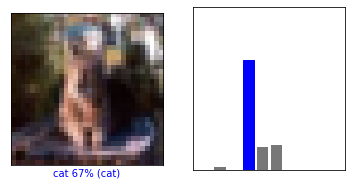

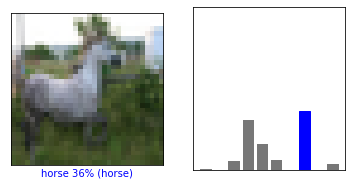

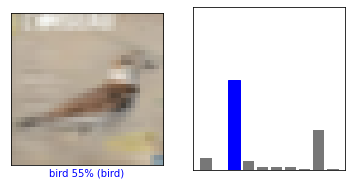

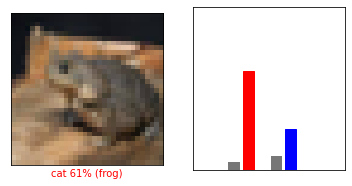

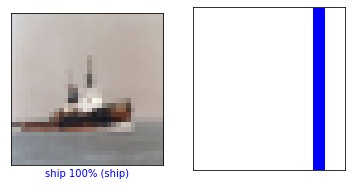

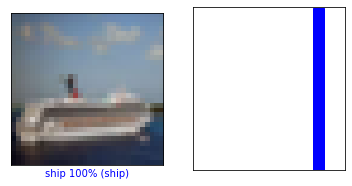

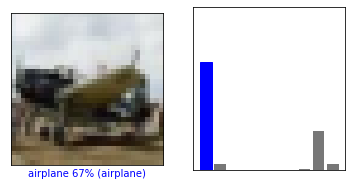

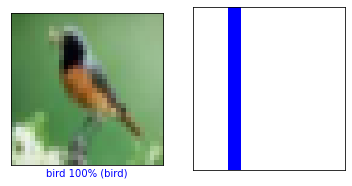

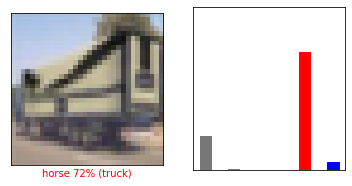

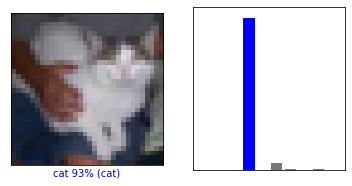

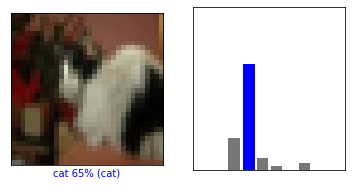

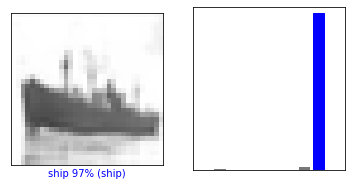

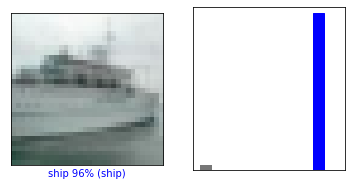

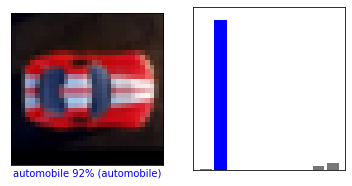

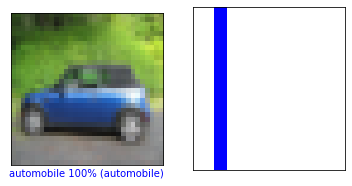

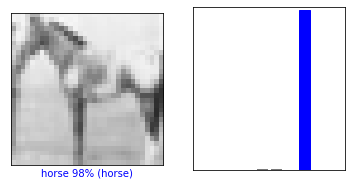

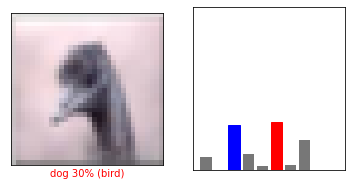

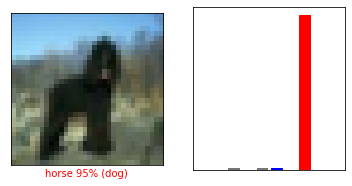

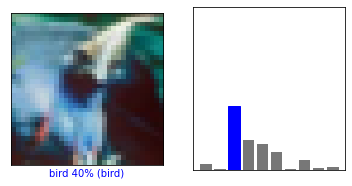

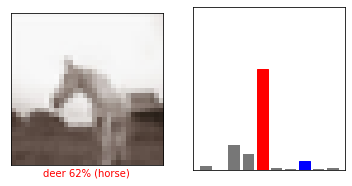

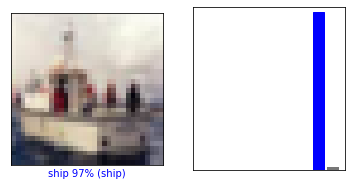

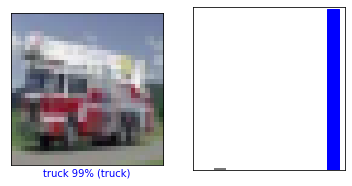

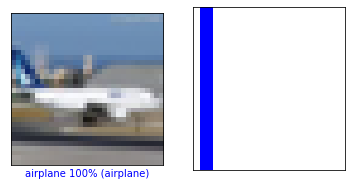

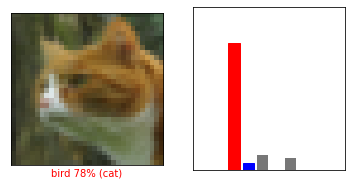

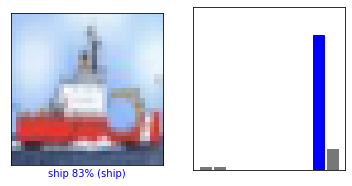

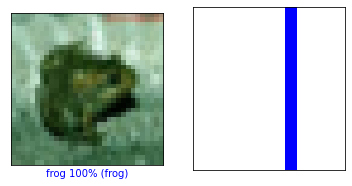

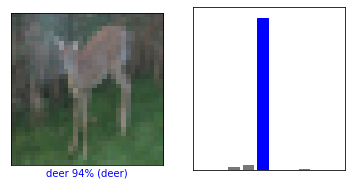

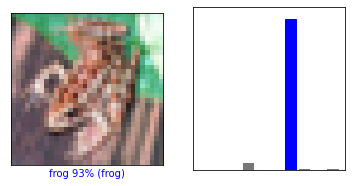

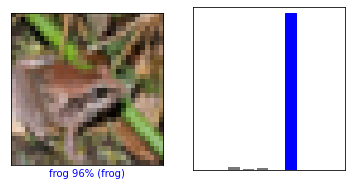

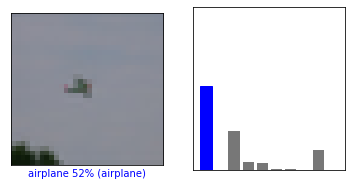

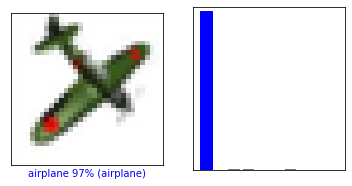

In [276]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label[0]].set_color('blue')
 
for i in range(99):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions,  test_labels)
    plt.show()

###### 먼저 CIFAR-10 데이터셋을 불러와서 사용할 수 있도록 준비해주었다. 

###### Train samples: (50000, 32, 32, 3) (50000, 1)
###### Test samples: (10000, 32, 32, 3) (10000, 1)

###### train셋 내  처음 25개의 이미지가 어떻게 생겼는지 확인한 후,  0~255의 픽셀값을              갖는 이미지들을 CNN 모델에 입력해주기 위해 0에서 1의 값을 갖도록 조정해주었다. 
###### train_images = train_images/255.0, 
###### test_images = test_images/255.0

###### CNN 모델의 구조를 결정해주고,  3개의 컨볼루션 층과 2개의 Fully-connected(FC) 층을 갖도록 만들었습니다. 10개의 클래스를 분류해야하는 모델이므로 마지막 FC 층은 10개 의 노드를 갖고 활성화함수로 softmax 함수를 사용하였다. train방식을 결정한 다음에 train셋을 이용해서 모델을 훈련시켜주고, epoch는 10으로 설정하였다.  in[263]~in[264]

###### 테스트셋을 이용해서 훈련된 모델의 성능을 평가해주었다. 0.6959

###### 예측 결과를 그래프로 보여주기 위한 함수들을 만들어주어 in[266], 테스트셋의 첫번째 이미지부터 100번째 이미지에 대한 예측 결과를 확인해주었다.